In [7]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
import brian2 as b2 
from brian2tools import *

In [9]:
b2.prefs.codegen.target = "numpy"

In `brian`, we can work with units:

In [10]:
3000*b2.mV + 1*b2.volt

4. * volt

## LIF
The leaky integrate and fire neuron is defined by the equation:
\begin{align}
    \tau\frac{dV}{dt} = -V
\end{align}

In [15]:
b2.start_scope()

tau = 10*b2.ms
f = 75*b2.Hz

eqs = '''
dV/dt = (1.5 + sin(2*pi*f*t)-V)/tau : 1
'''

G0 = b2.NeuronGroup(1, eqs, 
                   threshold = 'V>1',
                   reset = 'V=rand()',
                   method='euler')
G0.V = 0

M = b2.StateMonitor(G0, 'V', record = True)

b2.run(50*b2.ms)

For visualization, we can access the time by `M.t` and the voltage by `M.V`

In [16]:
print(M.V.shape)
print(M.t.shape)

(1, 500)
(500,)


In [17]:
print(type(M.V))
print(type(M.t))

<class 'numpy.ndarray'>
<class 'brian2.core.variables.VariableView'>


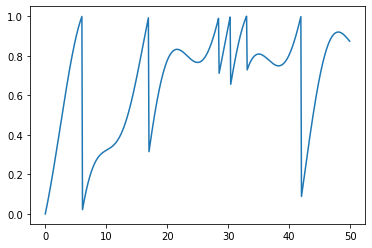

In [18]:
plt.plot(M.t/b2.ms, M.V[0]);

# Instead of above code, we can use brian built-in function `brian_plot(M);`

## Adaptive Threshold

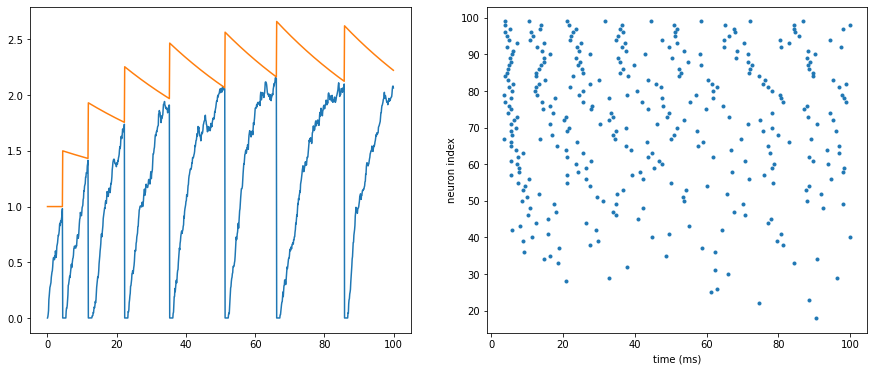

In [19]:
b2.start_scope()

tau = 10 * b2.ms
tau_t = 50 * b2.ms
f = 100 * b2.Hz

eqs = '''
dV/dt = (I-V)/tau + 0.25*xi*tau**-0.5 : 1   (unless refractory)
dVt/dt = (1-Vt)/tau_t : 1
I : 1
'''

G1 = b2.NeuronGroup(100, eqs, 
                   threshold = 'V>Vt',
                   reset = 'V=0; Vt += 0.5',
                   refractory = 1*b2.ms,
                   method='euler')

#G1.V = 'rand()' # Assign a random voltage as initial voltage for each neuron
G1.Vt = 1
G1.I = '3*i/(1.0*N)'

# We can use only a single StateMonitor to record both V, Vt. but in this situation, brian_plot() won't work.
M = b2.StateMonitor(G1, ('V', 'Vt'), record = [95]) # Only record the neuron index 0 information.
spM = b2.SpikeMonitor(G1) 

b2.run(100 * b2.ms)

plt.figure(figsize = (15, 6))
plt.subplot(121)    # On the leftside plot:
plt.plot(M.t/b2.ms, M.V[:].T)
plt.plot(M.t/b2.ms, M.Vt[:].T)
plt.subplot(122)    # On the rightside plot:
brian_plot(spM);

In [20]:
# To have access to spike times:
print(spM.t)

# To have the neuron index which fire:
print(spM.i)

<spikemonitor_1.t: array([ 3.6,  3.7,  3.9,  3.9,  4. ,  4. ,  4. ,  4.3,  4.4,  4.5,  4.6,
        4.7,  4.7,  4.9,  5. ,  5. ,  5.1,  5.2,  5.2,  5.4,  5.4,  5.5,
        5.5,  5.5,  5.5,  5.6,  5.6,  5.6,  5.7,  5.7,  5.9,  5.9,  6. ,
        6.1,  6.3,  6.8,  6.9,  7.1,  7.1,  7.1,  7.4,  7.5,  7.8,  7.8,
        8.1,  8.6,  8.8,  8.8,  9. ,  9.1,  9.4, 10.1, 10.3, 10.5, 10.6,
       10.7, 10.9, 11.2, 11.5, 11.7, 12.2, 12.4, 12.5, 12.6, 12.6, 12.7,
       12.9, 13.2, 13.2, 13.3, 13.6, 13.6, 13.9, 14. , 14.1, 14.3, 14.5,
       14.6, 14.6, 14.6, 14.7, 15. , 15.8, 15.9, 16.3, 16.3, 16.4, 16.5,
       17. , 17.1, 17.5, 17.8, 18. , 18.3, 18.7, 18.8, 20.3, 20.8, 20.9,
       20.9, 21. , 21.1, 21.1, 21.1, 21.2, 21.8, 21.8, 22. , 22. , 22.2,
       22.8, 22.9, 23.5, 23.5, 23.7, 23.8, 23.8, 24.1, 24.2, 24.4, 24.6,
       24.7, 25. , 25.3, 25.5, 25.6, 25.7, 25.7, 26.3, 26.3, 26.3, 27.4,
       27.5, 27.6, 27.6, 27.8, 27.9, 28. , 29.2, 29.6, 29.8, 30.1, 30.3,
       31.2, 31.8, 32.7, 32.9, 3